In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [7]:
data=pd.read_csv(r"C:\Users\hp\Downloads\retail_sales_dataset.csv")
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [10]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
data[data.duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [13]:
data.shape

(1000, 9)

In [14]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [15]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [16]:
print(data['Customer ID'].value_counts().max())

1


Here,There are no repeat purchases. Each customer has only one transaction

In [17]:
data.groupby('Product Category').agg({'Total Amount':['min','max','count']})

Total Amount            
                          min   max count
Product Category                         
Beauty                     25  2000   307
Clothing                   25  2000   351
Electronics                25  2000   342

->Here,Clothing category has the highest number of sales.

->Electronics comes in second.

In [18]:
data.groupby("Product Category").sum(numeric_only=True).loc[['Electronics']]

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Product Category,,,,,
Electronics,175911,14274,849,62210,156905


->Electronics have a revenue of contributing $156905 in total.

->849 quantity  sold out.

->This indicates that electronics products are moderately priced and contribute in high range.

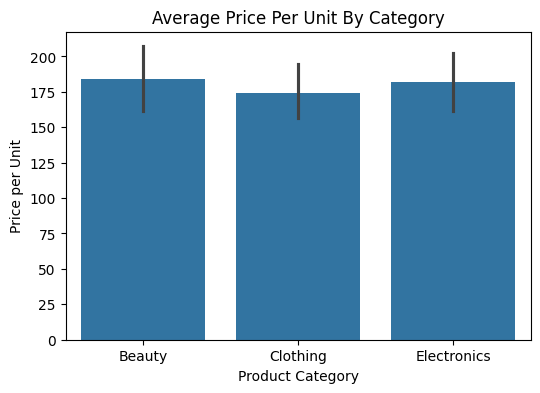

In [19]:
#Which product category generates the highest total revenue?
plt.figure(figsize=(6,4))
sns.barplot(data=data,x='Product Category',y='Price per Unit')
plt.title("Average Price Per Unit By Category")
plt.show()

->The average unit price is highest for beauty and electronic categories,while clothing has the lowest average price per unit.

->This indicates that customers purchase clothing items at relatively lower prices, whereas Electronics and beauty items are moderately priced and generate higher revenue.

C:\Users\hp\AppData\Local\Temp\ipykernel_12156\1212282389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Gender',palette='coolwarm')


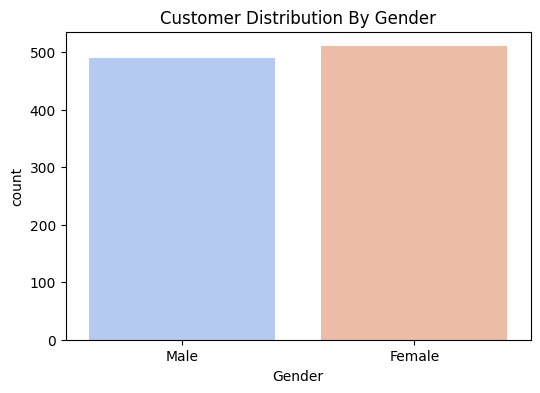

In [20]:
#Which gender has a higher number of customers?
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='Gender',palette='coolwarm')
plt.title("Customer Distribution By Gender")
plt.show()

-> The dataset shows that the Female customers form the majority of the buyers.

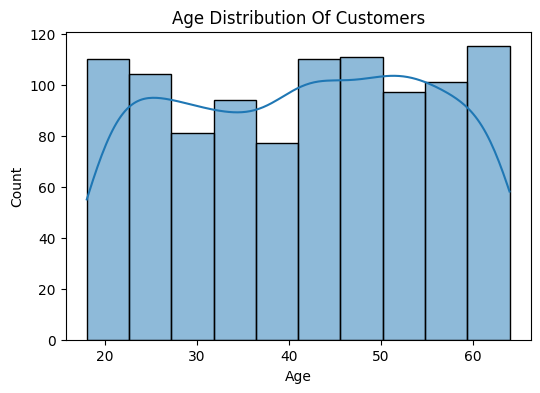

In [21]:
#Is the customer base concentrated in younger,middle-aged,or older groups?
plt.figure(figsize=(6,4))
sns.histplot(data=data,x='Age',bins=10,kde=True)
plt.title("Age Distribution Of Customers")
plt.show()

->The age distribution shows a fairly even spread, with noticeable peaks around ages 30–35 and 50–55.
 
->This indicates strong engagement from both younger and middle-aged customers.

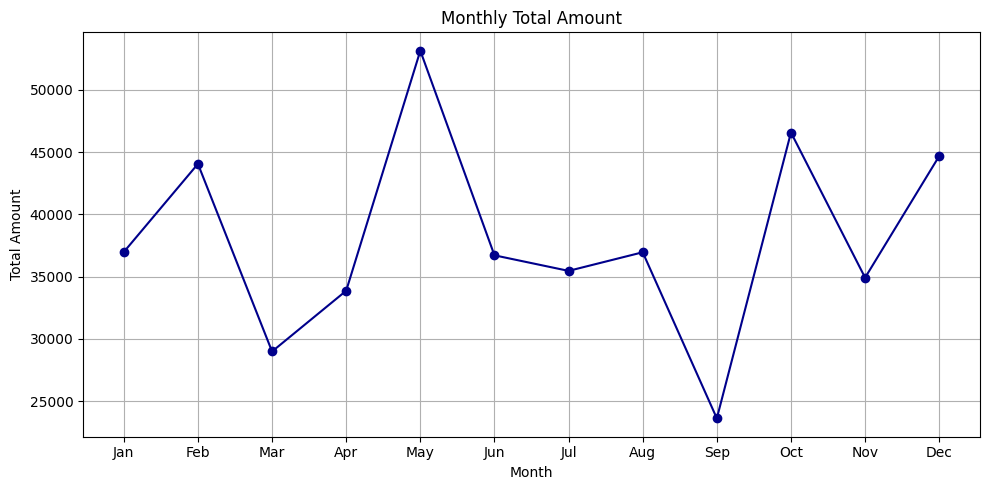

In [ ]:

data['month'] = data['Date'].dt.strftime('%b')  

data['month_num'] = data['Date'].dt.month
monthly_total = data.groupby(['month_num', 'month'])['Total Amount'].sum().reset_index()
monthly_total = monthly_total.sort_values('month_num')
plt.figure(figsize=(10, 5))
plt.plot(monthly_total['month'], monthly_total['Total Amount'], marker='o', color='darkblue')
plt.title('Monthly Total Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12156\840658268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Weekday',y='Total Amount',estimator=sum,palette='Pastel2',


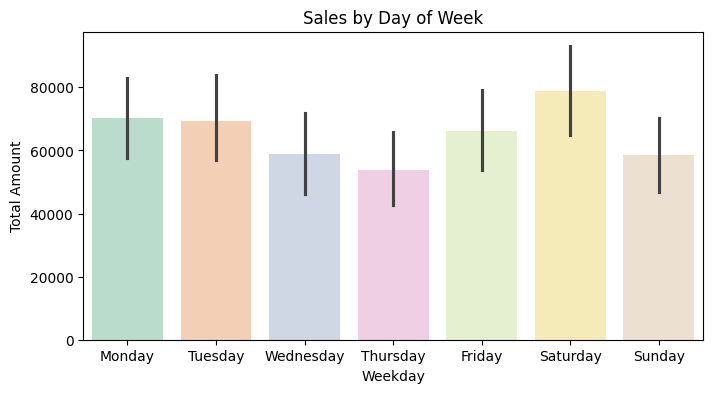

In [23]:
#Which day shows the highest average sales?
data['Weekday']=data['Date'].dt.day_name()
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Weekday',y='Total Amount',estimator=sum,palette='Pastel2',
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Sales by Day of Week')
plt.show()

->Sales peak on Saturday, making it the strongest day of the week.

->Sunday sees a noticeable dip, while weekday sales remain moderate and relatively consistent.

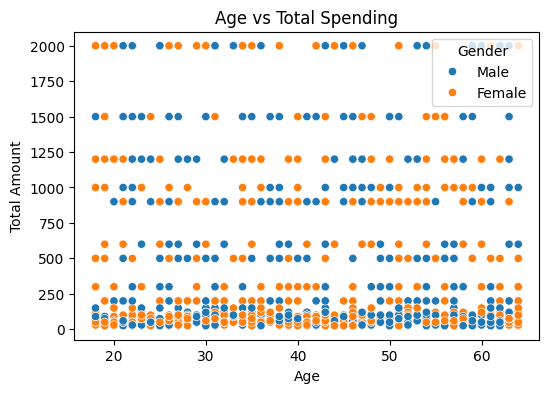

In [24]:
#How does total spending vary across different age groups?
plt.figure(figsize=(6,4))
sns.scatterplot(data=data,x='Age',y='Total Amount',hue='Gender')
plt.title("Age vs Total Spending")
plt.show()

->Total spending is widely distributed across all age groups, with no strong correlation between age and spending.

->Both male and female customers show similar spending patterns, indicating consistent purchasing behavior.

In [25]:
data.corr(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,month_num
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034,0.047538
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568,-0.000640
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707,-0.021803
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925,-0.008161
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000,-0.005197
month_num,0.047538,-0.000640,-0.021803,-0.008161,-0.005197,1.000000


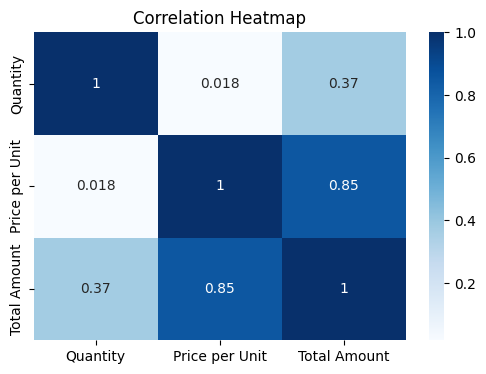

In [26]:
#Which variables show the strongest positive correlation?
plt.figure(figsize=(6,4))
sns.heatmap(data[['Quantity','Price per Unit','Total Amount']].corr(),annot=True,cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

->The heatmap shows a strong positive correlation between Price per unit and Total Amount.

->Other variables like Quantity and Total Amount have weak correlations.



C:\Users\hp\AppData\Local\Temp\ipykernel_12156\3553059044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='Product Category',y='Quantity',palette='Set2')


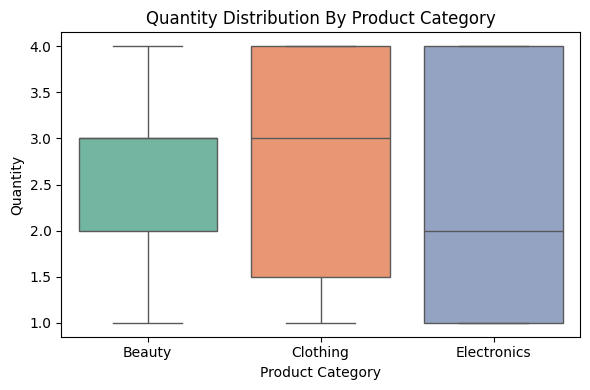

In [27]:
#How does the quantity distribution vary across different product categories, and what might this suggest about customer purchasing preferences?
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='Product Category',y='Quantity',palette='Set2')
plt.title("Quantity Distribution By Product Category")
plt.tight_layout()
plt.show()

->Clothing category people's buy in larger and more varied quantities.

->Beauty & Electronics category people's usually buy fewer items, and quantities don’t vary much.

->Clothing has a higher median quantity than Beauty and Electronics.
